# Heart Rate Variability Exploration

In this iPython notebook we will explore how to extract HRV data from raw ECG signals.

In [1]:
%pylab inline
# import numpy as np
# import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


The first thing to do is plot some data, for that we need to import it. If we inspect `ecg_60seconds.csv` using `less`, we can observe that the first line contains headers describing the data: timestamp, sample, timestamp_min; in that order. Let's import it into python so we can play with it


In [2]:
data = np.loadtxt('./ecg_60seconds.csv', skiprows=1, delimiter=',')
X,y  = data[:,0], data[:,1] 
X = ( X - X.min() ) / 1000 # remove the min time and turn it to seconds

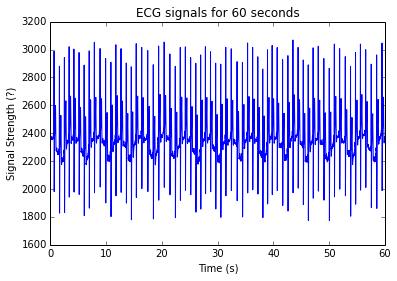

In [3]:
plt.plot(X, y) # plot the ECG signals
plt.title('ECG signals for 60 seconds')
plt.xlabel('Time (s)')
plt.ylabel('Signal Strength (?)')

Can't really make out any patterns here, maybe if we move in closer.

(28, 31)

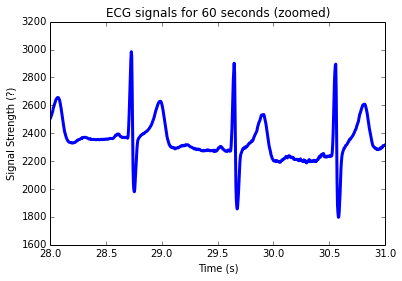

In [4]:
plt.plot(X, y, 'b-', linewidth=3) # plot the ECG signals
plt.title('ECG signals for 60 seconds (zoomed)')
plt.xlabel('Time (s)')
plt.ylabel('Signal Strength (?)')
plt.xlim(28,31)

This looks great, quite simillar to the graphic from Wikipedia:
![R-R interval](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c1/ECG-RRinterval.svg/375px-ECG-RRinterval.svg.png)
We can clearly see the QRS complex and the T-peak. To extract HRV, we need to get the RR-interval displayed as in the picture. Next we proceed to play with these ECG signals to see what we can extract from it!

## Normalization
We would like the y-values to be between -1 and 1. This is done by removing the mean of the wave called the [DC bias, DC component or the DC offset](https://en.wikipedia.org/wiki/DC_bias) and then dividing by the max to bound it between 1 and -1.

(28, 31)

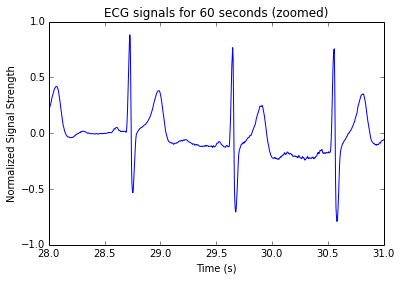

In [6]:
y -= y.mean() # get rid of the DC component
y /= y.max() # normalization
plt.plot(X, y) # plot the ECG signals
plt.title('ECG signals for 60 seconds (zoomed)')
plt.xlabel('Time (s)')
plt.ylabel('Normalized Signal Strength')
plt.xlim(28,31)

In [5]:
import scipy.signal as signal

The filter function is given by the following ratio of the input $x(t)$ and the output $y(t)$:
$$ H(s) = \frac{\mathcal{L}\{y(t)\}}{\mathcal{L}\{x(t)\}} = \frac{Y(s)}{X(s)} $$
Where $X(s)$ and $Y(s)$ are the laplace transforms of $x$ and $y$ respectively.

# Filtering

In [11]:
# Low pass filter
a = [1, -2, 1]
b = [1, 0, 0, 0, 0, 0, -2, 0, 0, 0, 0, 0, 1]
y_dash = signal.lfilter(b,a,y)

In [12]:
# High pass filter
a = [1, -2, 1]
b = [1, 0, 0, 0, 0, 0, -2, 0, 0, 0, 0, 0, 1]
y_dash = signal.lfilter(b, a, y_dash)

In [14]:
y_dash = list(y_dash[20:len(y_dash)]) + list(np.zeros(5)) + list(np.zeros(15))

(28, 31)

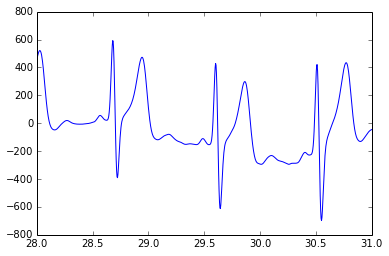

In [16]:
plt.plot(X, y_dash) # plot the ECG filtered
plt.xlim(28,31)

# Derivative

In [17]:
y3 = []
for i in range(3, len(y_dash)-2):
    y3.append( (-y_dash[i-2] - 2*y_dash[i-1] + 2*y_dash[i+1] +y_dash[i+1] ) / 8.0 )

y3 = [0,0,0] + y3 + [0, 0]

(28, 31)

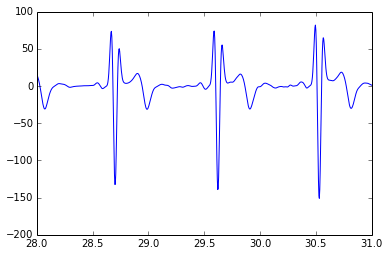

In [18]:
plt.plot(X, y3) # plot the ECG filtered
plt.xlim(28,31)

# Squaring

In [34]:
y4 = []
for i in y3:
    y4.append(i*i)


(28, 31)

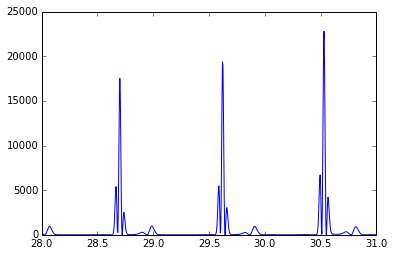

In [35]:
plt.plot(X, y4) # plot the ECG squared
plt.xlim(28,31)

# Moving windows integration

In [37]:
Nwindow=34
y5 = []
for i in range(0, Nwindow):
    acum = 0
    for j in range(0,i):
        acum = acum + y4[j]
    y5.append(acum)

for i in range(Nwindow, len(y4)):
    acum = acum + y4[i] - y4[i-Nwindow]
    y5.append(acum)

y5 = list(y5/numpy.max(y5))

(28, 31)

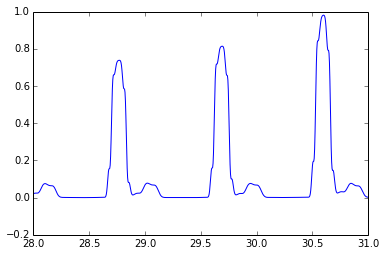

In [40]:
plt.plot(X, y5) # plot the ECG squared
plt.xlim(28,31)